In [1]:
#Initial imports
import pandas as pd
import numpy as np 
import sqlite3 


In [2]:
#Connect to database
conn = sqlite3.connect('avocado.db')

In [3]:
#Create cursor
cur = conn.cursor()
avo = cur.execute("""
  select * from avocado;"""
).fetchall()

In [4]:
#Create first dataframe
df = pd.DataFrame(data=avo)

In [5]:
#Preview the data
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [6]:
#Column names are missing. 
#Make a for loop to see names of columns.
colnames = cur.description
for row in colnames:
    print (row[0])

field1
Date
AveragePrice
TotalVolume
4046
4225
4770
TotalBags
SmallBags
LargeBags
XLargeBags
type
year
region


In [7]:
#Add column names to our table
Frame=pd.DataFrame(avo, columns = ["field1", "Date", "AveragePrice", "TotalPrice","4046","4225","4770","TotalBags","SmallBags",
                                  "LargeBags","XLargeBags","type","year","region"])

In [8]:
#Column names are now added to table
Frame.head()

,field1,Date,AveragePrice,TotalPrice,4046,4225,4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [9]:
#How does Louisville's average price for an avocado compare with the region with the highest average price for an avocado?
conn2 = sqlite3.connect('avocado.db')

In [10]:
#Execute a SQL query that finds the information we need to answer this question
cur2 = conn2.cursor()
avo2 = cur2.execute("""
  Select * from 
(
SELECT 
REGION, 
AVG(AVERAGEPRICE) AS AVG_REGION_PRICE,
MIN(AVERAGEPRICE) AS MIN_REGION_PRICE,
MAX(AVERAGEPRICE) AS MAX_REGION_PRICE
FROM AVOCADO
GROUP BY REGION
ORDER BY AVG(AVERAGEPRICE) DESC
LIMIT 1
)

UNION

SELECT 
REGION, 
AVG(AVERAGEPRICE) AS AVG_REGION_PRICE,
MIN(AVERAGEPRICE) AS MIN_REGION_PRICE,
MAX(AVERAGEPRICE) AS MAX_REGION_PRICE
FROM AVOCADO
WHERE REGION = 'Louisville'
GROUP BY REGION
ORDER BY AVG(AVERAGEPRICE) DESC
;"""
).fetchall()

In [11]:
#Convert this query into a dataframe in order to illustrate it
df2 = pd.DataFrame(data=avo2)

In [12]:
#View dataframe
df2.head()

,0,1,2,3
0,HartfordSpringfield,1.818639,0.86,2.68
1,Louisville,1.286686,0.56,2.29


In [13]:
#No column names like before.  let's add them
colnames2 = cur2.description
for row in colnames2:
    print (row[0])

REGION
AVG_REGION_PRICE
MIN_REGION_PRICE
MAX_REGION_PRICE


In [14]:
Frame2=pd.DataFrame(avo2, columns = ["REGION", "AVG_REGION_PRICE", "MIN_REGION_PRICE","MAX_REGION_PRICE"])

In [15]:
#Column names are now added
Frame2.head()

,REGION,AVG_REGION_PRICE,MIN_REGION_PRICE,MAX_REGION_PRICE
0,HartfordSpringfield,1.818639,0.86,2.68
1,Louisville,1.286686,0.56,2.29


In [16]:
#Louisville's average price is $.60 lower than HartfordSpringfield, which had the highest average price per avocado.
#Louisville's maximum price and minimum price was lower as well.

#Now we will illustrate this data using matplotlib
import matplotlib.pyplot as plt

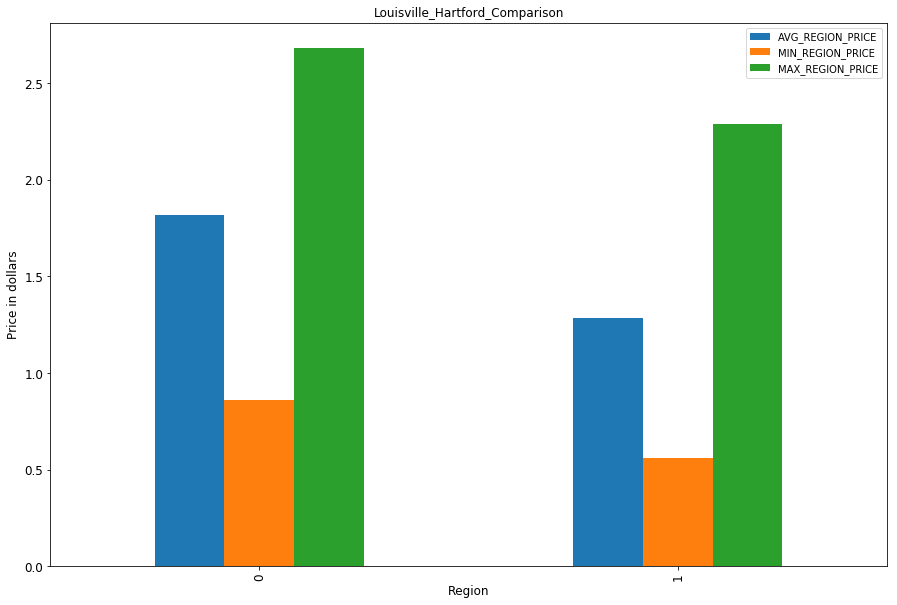

In [17]:
#Illustrate using a bar plot
ax = Frame2[['AVG_REGION_PRICE','MIN_REGION_PRICE','MAX_REGION_PRICE']].plot(kind='bar', title ="Louisville_Hartford_Comparison", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Region", fontsize=12)
ax.set_ylabel("Price in dollars", fontsize=12)
plt.show()

In [18]:
#How does the average price of an avocado in Louisville compare region with the lowest average price?
conn3 = sqlite3.connect('avocado.db')

In [19]:
#Execute this SQL query to answer this question
cur3 = conn3.cursor()
avo3 = cur3.execute("""
  Select * from 
(
SELECT 
REGION, 
AVG(AVERAGEPRICE) AS AVG_REGION_PRICE,
MIN(AVERAGEPRICE) AS MIN_REGION_PRICE,
MAX(AVERAGEPRICE) AS MAX_REGION_PRICE
FROM AVOCADO
GROUP BY REGION
ORDER BY AVG(AVERAGEPRICE)
LIMIT 1
)

UNION

SELECT 
REGION, 
AVG(AVERAGEPRICE) AS AVG_REGION_PRICE,
MIN(AVERAGEPRICE) AS MIN_REGION_PRICE,
MAX(AVERAGEPRICE) AS MAX_REGION_PRICE
FROM AVOCADO
WHERE REGION = 'Louisville'
GROUP BY REGION
ORDER BY AVG(AVERAGEPRICE) DESC
;"""
).fetchall()

In [20]:
#Create dataframe in order to illustrate this data
df3 = pd.DataFrame(data=avo3)

In [21]:
#Preview data
df3.head()

,0,1,2,3
0,Louisville,1.286686,0.56,2.29
1,Houston,1.047929,0.51,1.92


In [22]:
#Once again we will need to add the column names
colnames3 = cur3.description
for row in colnames3:
    print (row[0])

REGION
AVG_REGION_PRICE
MIN_REGION_PRICE
MAX_REGION_PRICE


In [23]:
Frame3=pd.DataFrame(avo3, columns = ["REGION", "AVG_REGION_PRICE", "MIN_REGION_PRICE","MAX_REGION_PRICE"])

In [24]:
#Column names are now added
Frame3.head()

,REGION,AVG_REGION_PRICE,MIN_REGION_PRICE,MAX_REGION_PRICE
0,Louisville,1.286686,0.56,2.29
1,Houston,1.047929,0.51,1.92


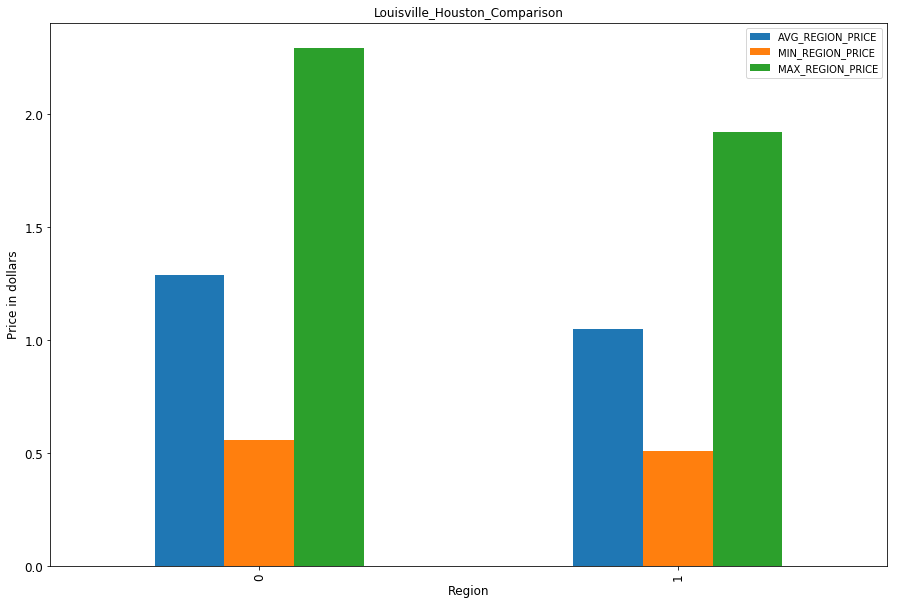

In [26]:
#Louisville's average price is $.24 more expensive than Houston, which has the cheapest avocados on average.
#Louisville' minimum price is slightly higher while it's maximum price is noticeably higher.

#Use another bar plot to illustrate this data
ax = Frame3[['AVG_REGION_PRICE','MIN_REGION_PRICE','MAX_REGION_PRICE']].plot(kind='bar', title ="Louisville_Houston_Comparison", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Region", fontsize=12)
ax.set_ylabel("Price in dollars", fontsize=12)
plt.show()

In [ ]:
####################WORKS TO THIS POINT############################################################